<a href="https://colab.research.google.com/github/lyagmaia/full-stack/blob/main/Nv5_colocando_tudo_em_ordem_e_guardando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
Objetivo: Implementar um programa para gerar dados com nomes de pessoas e suas respectivas pontuações, gravar em um arquivo, recuperar os dados do arquivo, visualizar os dados das pontuações das pessoas em um histograma e em uma nuvem de palavras.

---


1 - Instalando pacotes necessários para geração de dados e criação da nuvem de palavras



In [13]:
!pip install faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.1 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=7ad36d9565329d547fd3cc515adb17066a5c89fa8cf251e5a7b76a04b1ae9713
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt



2 - Gerando os dados para o teste


In [4]:
import csv
import pandas as pd
from faker import Faker
fake = Faker('pt_BR')

nome = []
nota = []

for i in range(0, 20):
  nome.append(fake.name())
  nota.append(fake.random_int(1,10))

dados = pd.DataFrame()
dados["nomes"] = nome
dados["notas"] = nota

3 - Gravando os dados em um arquivo CSV

In [5]:
with open('dados.csv', 'w') as arquivo:
  arquivo.write(str(dados))

4 - Abrindo um arquivo e carregando os dados

In [6]:
with open("dados.csv", "r") as arquivo:
  base_dados = arquivo.read()

In [7]:
print(base_dados)

                       nomes  notas
0         Vitor Hugo Martins      4
1          Maria Luiza Cunha      3
2      João Guilherme Duarte      1
3             Samuel Costela      9
4       Maria Vitória Fogaça      6
5             Isabella Rocha      8
6      Srta. Mariane Ribeiro      6
7                Erick Ramos     10
8               André Castro     10
9            Gabriela Vieira      4
10             Daniela Ramos      8
11              Laís Peixoto      5
12             Alice da Cruz      7
13             Lucca da Cruz      6
14  Sr. João Gabriel Almeida      6
15     Pedro Henrique Novaes      2
16            Eloah Teixeira      9
17                Yuri Pinto      1
18          Ana Julia Farias      8
19              Vitor Barros      5


In [8]:
lst_notas = dados.notas

5 - Criando Histograma

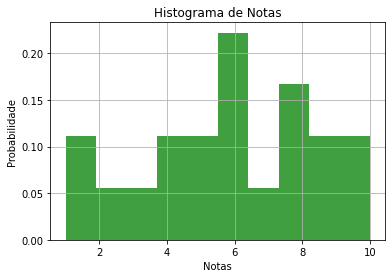

In [9]:
import matplotlib.pyplot as plt

num_bins=10; plt.hist(lst_notas, num_bins, density=True, facecolor='green',alpha=0.75)

plt.xlabel("Notas")
plt.ylabel("Probabilidade")
plt.title("Histograma de Notas")
plt.grid(True)
plt.show()

6 - Criando a Nuvem de Palavras

In [10]:
from wordcloud import WordCloud
from num2words import num2words

7 - Preparando os dados para a nuvem de palavras

In [11]:
num_ext = []
#range = lst_notas[0:]
#posicao = 12

for posicao in range(0,19):
    num = num2words(lst_notas[posicao], lang='pt-br')
    num_ext.append(str(num))
print(num_ext)
texto = ",".join(num_ext)

['quatro', 'três', 'um', 'nove', 'seis', 'oito', 'seis', 'dez', 'dez', 'quatro', 'oito', 'cinco', 'sete', 'seis', 'seis', 'dois', 'nove', 'um', 'oito']


8 - Exibindo a nuvem de palavras

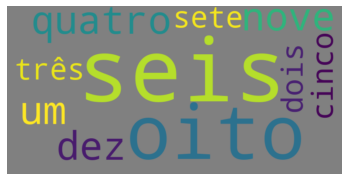

In [12]:
nuvem_palavras = WordCloud(background_color='grey',
                           width=800,height=400).generate(texto)
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
nuvem_palavras.to_file("Nuvem de palavras.png")

---
**Análise e Conclusão:**
---

**Qual a importância de manipular arquivos de texto?**

No Python, assim como em outras liguagens de programação, saber manupular arquivos de texto é de grande importância para qualquer desenvolvedor, seja para criar backups, carregar uma lista de alguma planilha, etc. Por isso, a maioria das linguagens de programação possuem meios para essa manipulação.
Desenvolver análises a parti de de dados existentes em arquivos é uma das principais atividades praticadas por usuários de Python atualmente.


**Qual a importância de visualizar os dados em um histograma?**


Um histograma serve para mostrar a distribuição dos valores de um grupo de dados, dispondo as informações de modo a facilitar a interpretação da distribuição dos dados.


**O que significa a visualização por nuvem de palavras?**

Com a nuvem de palavras temos uma apresentação e visualização de dados de texto de forma super resumida através de nuvem de palavras. Com essa nuvem podemos  perceber de forma rápida quais os termos mais comuns em um conjunto de dados.
